# <center>Lista 08 - Aprendizado de Máquina</center>

**Aluno(a):** Marianna de Pinho Severo <br>
**Matrícula:** 374856 <br>
**Professor(a):** Regis Pires

Nesta lista, voltaremos a utilizar o [Iris dataset](https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Firis%2Firis.data&sa=D&sntz=1&usg=AFQjCNFKq79DXPZbLNQzSgdmE8keMrY2ow), mas, desta vez, para estudar métricas para análise de modelos de aprendizado.

### Passo 01: Importar Bibliotecas

In [199]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, roc_curve, roc_auc_score

### Passo 02: Carregar dataset

In [184]:
flowers = pd.read_csv('dataset/iris.data', sep=',', header=None)

### Passo 03: Breve análise dos dados

In [185]:
flowers.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [186]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [187]:
flowers[4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64

## Questão 01: Calcular as métricas de classificação

### Métrica 01: Acurácia
A acurácia é dada por $$acc = \frac{TP + TN}{T}$$ em que T = TP + TN + FP + FN. Quando fazemos a matriz de confusão para um modelo, a acurácia pode ser calculada pela soma dos valores da diagonal dessa matriz (todos os TPs para cada classe) dividida pela quantidade total de predições. Isso acontece porque a acurácia nos diz a porcentagem de predições que acertamos a partir do total de predições. Assim, um TN de uma classe, na verdade, é o TP das outras, uma vez que não devemos considerar para a acurácia os TN que não foram classificados corretamente para uma determinada classe.

In [188]:
def multiclass_accuracy(ConfusionMatrix):
    return np.sum(np.diagonal(ConfusionMatrix))/np.sum(ConfusionMatrix)

### Métrica 02: Precisão

A precisão é dada por $$pre = \frac{TP}{TP + FP}$$
Ela nos diz a porcentagem do que acertamos daquilo que dissemos que era verdade. Dessa forma, se dissemos que uma flor pertencia a determinada classe, ela nos diz a porcentagem dessas flores que realmente pertencia.

In [189]:
def multiclass_precision(ConfusionMatrix, support):
    Precision = []

    for pos in range(ConfusionMatrix.shape[1]):
        Precision.append(ConfusionMatrix[pos][pos]/np.sum(ConfusionMatrix[:, pos]))
        Precision[pos] = Precision[pos]*support[pos]
        
    return np.sum(Precision)/np.sum(support)

### Métrica 03: Recall

O Recall é dado por $$ rec = \frac{TP}{TP + FN} $$

Ele nos diz a porcentagem de predições positivas que tivemos do total de todas as amostras realmente positivas. Ou seja, quantas das amostras positivas realmente classficamos como positivas. Dessa forma, se quiséssemos determinar a classe de uma flor, ele nos diria quantas das flores que realmente são de uma determinada classe nós classificamos certo.

In [190]:
def multiclass_recall(ConfusionMatrix, support):
    Recall = []
    
    for pos in range(ConfusionMatrix.shape[0]):
        Recall.append(ConfusionMatrix[pos][pos]/np.sum(ConfusionMatrix[pos, :]))
        Recall[pos] = Recall[pos]*support[pos]
        
    return np.sum(Recall)/np.sum(support)

### Métrica 04: F1_measure

O F1_measure é dado pela média harmônica entre a precisão e o recall. Dessa forma, podemos escrevê-lo como:

$$ F1 = \frac{2*pre*rec}{pre+rec} $$

In [191]:
def multiclass_F1(precision, recall):
    return (2*precision*recall)/(precision + recall)

## Questão 02: Dividir conjunto de treino e teste

Agora, dividiremos o dataset em conjunto de treino e teste, de maneira estratificada, e realizamos a standardização dos dados.

### Passo 01: Dividir variváveis de entrada e saída

In [193]:
X = flowers.values[:, :-1]
y = flowers.values[:, -1]

### Passo 02: Transformar label para formato numérico

In [141]:
le = LabelEncoder()
y = le.fit_transform(y)

### Passo 03: Separar conjunto de treino e teste

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.90, random_state=42, stratify = y)

### Passo 04: Standardizar os dados

In [143]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Questão 03: Criar modelo de classificação com Logistic Regression

In [146]:
model = LogisticRegression(random_state=42,solver='lbfgs', multi_class= 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Questão 04: Avaliar modelo usando métricas de classificação

### Passo 01: Criar matriz de confusão

O primeiro passo para que possamos avaliar o modelo, é criar a matriz de confusão correspondente. Dessa forma, temos que:

In [153]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)

### Passo 02: Criar array com valores de support

O support guarda a quantidade de elementos de cada classe utilizados para construir a matriz de confusão.

In [154]:
support = np.sum(ConfusionMatrix, axis=1)

### Passo 03: Aplicar métricas

In [156]:
multiclass_accuracy(ConfusionMatrix)

0.9481481481481482

In [159]:
pre = multiclass_precision(ConfusionMatrix, support)
pre

0.9489039329464861

In [160]:
rec = multiclass_recall(ConfusionMatrix, support)
rec

0.9481481481481482

In [161]:
multiclass_F1(pre, rec)

0.9485258899951349

## Questão 05: Calcular o Log_Loss

O Log_loss é uma função de custo que indica, entre outras coisas, a acurácia do modelo. Quanto mais próximo de zero estiver seu valor, maior é acurácia. Ao invés de trabalhar com as classes em si, ela trabalha com as probabilidades de cada classe aparecer.

### Passo 01: Calcular probabilidades para cada classe

In [163]:
y_score = model.predict_proba(X_test)

### Passo 02: Calcular o Log_Loss

In [165]:
log_loss(y_test, y_score)

0.30437519572019617

## Questão 06: Desenhar a curva ROC

Text(0.5, 0, 'False Positive Rate')

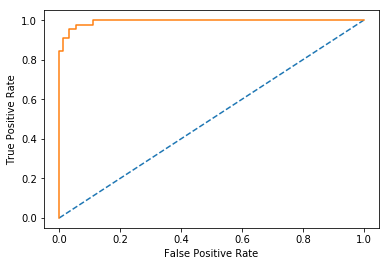

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,2], pos_label=2)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Questão 07: Calcular a métrica AUC

In [205]:
y_test_binary = np.where(y_test == 2, 1, 0)

In [206]:
roc_auc_score(y_test_binary, y_score[:, 2])

0.994074074074074